Nama : Muhammad Reesa Rosyid

Program : Python for Data Science

# <center> Assignment 2

## NYC Property Sales

**Context**

This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.


**Content**

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:
* BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time. See the glossary linked to below.

For further reference on individual fields see the Glossary of Terms. For the building classification codes see the Building Classifications Glossary.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:
* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

**Acknowledgements**

This dataset is a concatenated and slightly cleaned-up version of the New York City Department of Finance's Rolling Sales dataset.

## Hipotesa

Apakah ada perbedaan unit yang dijual antara properti yang dibangun pada tahun 1900 -2000 dan 2001-2017

## Import Library

In [1]:
import numpy as np  
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
#Styling plot
mpl.style.use(['ggplot'])
sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('talk')

## Exploring Dataset

**Memanggil dataset**

In [3]:
df = pd.read_csv('nyc-rolling-sales.csv')
pd.set_option("display.max.columns", None) # Memperlihatkan kolom yang tidak kelihatan
pd.set_option("display.max.rows", None) # Memperlihatkan baris yang tidak baris

**Menampilkan 5 data teratas dan 5 data terbawah**

In [4]:
# Melihat 5 Data teratas
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
# Melihat 5 data terbawah
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


**Melihat info dari dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

**Pengecekan nullable dan duplicated data pada dataset**

In [7]:
# Melihat apakah terdapat missing value
df.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [8]:
# Melihat apakah terdapat duplicated data
df.duplicated().sum()

0

Terlihat dari info dataset dan pengecekan null value di atas, pandas tidak mendapati missing value dan duplicate value. Namun akan dilakukan pengecekan lebih lanjut apakah ada missing value yang tidak terbaca oleh pandas.

### Data cleansing

Pertama yang dilakukan adalah membuang kolom yang tidak dibutuhkan.

In [9]:
# Drop kolom yang tidak dibutuhkan
df.drop(['Unnamed: 0', 'BLOCK', 'LOT', 'EASE-MENT','APARTMENT NUMBER', 'ZIP CODE',  'TAX CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'BUILDING CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE', 'NEIGHBORHOOD','BUILDING CLASS CATEGORY','ADDRESS', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE', 'SALE DATE'], axis=1, inplace=True)
df.head()

,BOROUGH,TOTAL UNITS,YEAR BUILT
0,1,5,1900
1,1,31,1900
2,1,17,1900
3,1,10,1913
4,1,6,1900


Selanjutnya akan dicek kolom satu persatu.

#### KOLOM BOROUGH

In [10]:
df['BOROUGH'].value_counts()

4    26736
3    24047
1    18306
5     8410
2     7049
Name: BOROUGH, dtype: int64

Pada kolom BOROUGH hanya berisikan id 1,2,3,4,5 dan tipe datanya adalah integer. Kita tahu pada "**BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).**" Oleh karena itu, tipe data dari borough akan diganti menjadi str dan mereplace id borough menjadi nama borough sesuai pada informasi conten dataset.

**Mengubah tipedata kolom borough**

In [11]:
df['BOROUGH'] = df["BOROUGH"].astype(str)
df.dtypes

BOROUGH        object
TOTAL UNITS     int64
YEAR BUILT      int64
dtype: object

**Mengganti value borough dari id menjadi nama yang sesuai**

In [12]:
df["BOROUGH"] = df["BOROUGH"].replace('1', 'MANHATTAN')
df["BOROUGH"] = df["BOROUGH"].replace('2', 'BRONX')
df["BOROUGH"] = df["BOROUGH"].replace('3', 'BROOKLYN')
df["BOROUGH"] = df["BOROUGH"].replace('4', 'QUEENS')
df["BOROUGH"] = df["BOROUGH"].replace('5', 'STATEN ISLAND')

In [13]:
df['BOROUGH'].value_counts()

QUEENS           26736
BROOKLYN         24047
MANHATTAN        18306
STATEN ISLAND     8410
BRONX             7049
Name: BOROUGH, dtype: int64

Pada kolom borough sekarang sudah diubah tipedata object dan telah mengganti nama sesuai informasi dataset.

### KOLOM TOTAL UNITS

In [14]:
df["TOTAL UNITS"].value_counts()

1       38356
0       19762
2       15914
3        5412
4        1498
6         870
5         423
8         374
10        198
7         197
9         142
16        119
20         84
12         67
15         65
11         58
25         45
24         42
18         37
27         36
14         36
30         35
13         31
17         28
36         26
19         25
31         24
35         23
42         21
21         19
29         17
41         17
37         17
22         15
48         15
26         15
54         15
32         15
34         14
44         14
64         13
60         12
56         12
23         11
45         11
47         10
39         10
46         10
28          9
49          9
33          8
78          8
286         7
63          7
53          7
100         7
38          7
61          6
50          6
52          6
84          6
91          6
65          5
58          5
62          5
68          5
72          5
43          5
40          5
96          5
70          4
90    

In [15]:
df.dtypes

BOROUGH        object
TOTAL UNITS     int64
YEAR BUILT      int64
dtype: object

Sepertinya kolom TOTAL UNITS sudah sesuai dan tidak ada yang perlu diubah.

### KOLOM YEAR BUILT

In [16]:
df["YEAR BUILT"].value_counts()

0       6970
1920    6045
1930    5043
1925    4312
1910    3585
1950    3156
1960    2654
1940    2456
1931    2246
1955    1961
1899    1798
1901    1755
1935    1610
1965    1511
2015    1470
1945    1330
2014    1232
2007    1186
1915    1182
1900    1130
2005    1106
1970     952
1963     941
2008     935
2006     924
1962     839
2016     794
2013     743
1961     728
2004     715
1952     696
1928     684
1964     677
1905     653
1975     638
1987     635
1951     600
2009     579
2002     551
1956     525
1957     519
1926     519
1927     478
1929     474
1985     473
1986     466
1958     442
1988     429
1959     423
2003     421
1949     389
1989     388
1980     385
1953     373
2010     358
1939     354
1954     343
1924     336
1990     328
1972     302
1971     300
2012     276
2001     268
1973     268
1923     255
1967     245
1966     242
1937     235
1996     233
1932     230
2000     226
1948     220
1999     213
1941     213
1974     203
1983     203
1984     195

Sepertinya kolom YEAR BUILT sudah sesuai dan tidak ada yang perlu diubah.

### Hasil Cleansing Dataset

In [17]:
df.head()

,BOROUGH,TOTAL UNITS,YEAR BUILT
0,MANHATTAN,5,1900
1,MANHATTAN,31,1900
2,MANHATTAN,17,1900
3,MANHATTAN,10,1913
4,MANHATTAN,6,1900


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BOROUGH      84548 non-null  object
 1   TOTAL UNITS  84548 non-null  int64 
 2   YEAR BUILT   84548 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


## Preprocessing

Melakukan pivot table untuk mengetahui value total unit setiap daerah berdasarkan tahun pembangunan unit.

In [19]:
df = df.pivot_table(values="TOTAL UNITS", index=["YEAR BUILT"], columns=["BOROUGH"], aggfunc=np.sum)

In [20]:
df.head()

BOROUGH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
YEAR BUILT,,,,,
0,370.0,1568.0,1825.0,678.0,2.0
1111,NaN,NaN,0.0,NaN,NaN
1680,NaN,NaN,NaN,NaN,1.0
1800,0.0,40.0,2.0,NaN,1.0
1826,NaN,NaN,1.0,NaN,NaN


Slice df_1 untuk mengambil unit yang dibangun antara tahun 1900 sampai 2000 dan df_2 mengambil unit yang dibangun tahun 2001 sampai 2017.

In [21]:
years1 = list(range(1900,2001))
years2 = list(range(2001,2018))

In [22]:
df_1 = df.loc[years1]
df_1.head()

BOROUGH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
YEAR BUILT,,,,,
1900,23.0,693.0,3204.0,15.0,26.0
1901,627.0,2072.0,477.0,497.0,163.0
1902,15.0,7.0,5.0,4.0,NaN
1903,43.0,30.0,87.0,NaN,2.0
1904,31.0,9.0,109.0,NaN,NaN


In [23]:
df_2 = df.loc[years2]
df_2.head()

BOROUGH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
YEAR BUILT,,,,,
2001,58.0,115.0,77.0,87.0,166.0
2002,78.0,115.0,240.0,192.0,97.0
2003,78.0,187.0,146.0,109.0,140.0
2004,214.0,364.0,145.0,368.0,239.0
2005,163.0,481.0,473.0,394.0,137.0


Menambahkan kolom total yang berisikan jumlah total unit dari 4 daerah setiap tahun pada df_1 dan df_2.

In [24]:
# Menambah kolom total
df_1["TOTAL"] = df_1.sum(axis=1)

In [25]:
df_1

BOROUGH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,TOTAL
YEAR BUILT,,,,,,
1900,23.0,693.0,3204.0,15.0,26.0,3961.0
1901,627.0,2072.0,477.0,497.0,163.0,3836.0
1902,15.0,7.0,5.0,4.0,NaN,31.0
1903,43.0,30.0,87.0,NaN,2.0,162.0
1904,31.0,9.0,109.0,NaN,NaN,149.0
1905,298.0,1337.0,360.0,79.0,71.0,2145.0
1906,19.0,241.0,687.0,12.0,NaN,959.0
1907,68.0,86.0,31.0,NaN,NaN,185.0
1908,32.0,69.0,115.0,1.0,NaN,217.0


In [26]:
# Menambah kolom total
df_2["TOTAL"] = df_2.sum(axis=1)

In [27]:
df_2

BOROUGH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,TOTAL
YEAR BUILT,,,,,,
2001,58.0,115.0,77.0,87.0,166.0,503.0
2002,78.0,115.0,240.0,192.0,97.0,722.0
2003,78.0,187.0,146.0,109.0,140.0,660.0
2004,214.0,364.0,145.0,368.0,239.0,1330.0
2005,163.0,481.0,473.0,394.0,137.0,1648.0
2006,280.0,429.0,220.0,389.0,76.0,1394.0
2007,264.0,1148.0,439.0,421.0,45.0,2317.0
2008,92.0,364.0,377.0,317.0,29.0,1179.0
2009,50.0,884.0,103.0,212.0,17.0,1266.0


## Analisa statistik

### Mean

**Menentukan mean df_1**

In [28]:
# Menentukan mean df_1
df_1["TOTAL"].mean()

1536.2772277227723

**Menentukan mean df_2**

In [29]:
df_2["TOTAL"].mean()

1516.5294117647059

Jadi rata-rata dari total unit terjual yang dibangun tahun 1900 sampai 2001 adalah 1536.2772277227723 dan yang dibangun tahun 2001 sampai 2017 adalah 1516.5294117647059.

### Median

**Menentukan median df_1**

In [30]:
df_1["TOTAL"].median()

592.0

**Menentukan median df_2**

In [31]:
df_2["TOTAL"].median()

1266.0

Jadi median dari total unit terjual yang dibangun tahun 1900 sampai 2001 adalah 592 dan yang dibangun tahun 2001 sampai 2017 adalah 1266.

### Modus
**Menentukan modus df_1**

In [32]:
df_1["TOTAL"].mode()

0    381.0
1    434.0
2    526.0
Name: TOTAL, dtype: float64

**Menentukan modus df_2**

In [33]:
df_2["TOTAL"].mode()

0      239.0
1      355.0
2      503.0
3      513.0
4      660.0
5      722.0
6      859.0
7     1179.0
8     1266.0
9     1330.0
10    1394.0
11    1648.0
12    1749.0
13    2317.0
14    3335.0
15    3553.0
16    4159.0
Name: TOTAL, dtype: float64

Jadi median dari total unit terjual yang dibangun tahun 1900 sampai 2001 adalah 
*     381.0
*     434.0
*     526.0

dan yang dibangun tahun 2001 sampai 2017 adalah

*      239.0
*       355.0
*       503.0
*       513.0
*      660.0
*       722.0
*       859.0
*      1179.0
*      1266.0
*      1330.0
*     1394.0
*     1648.0
*     1749.0
*     2317.0
*     3335.0
*     3553.0
*     4159.0

### Range

**Menentukan range df_1**

In [34]:
Range1 = df_1["TOTAL"].max()-df_1["TOTAL"].min()

In [35]:
Range1

15496.0

**Menentukan range df_2**

In [36]:
Range2 = df_2["TOTAL"].max()-df_2["TOTAL"].min()

In [37]:
Range2

3920.0

Jadi median dari total unit terjual yang dibangun tahun 1900 sampai 2001 adalah 15496 dan yang dibangun tahun 2001 sampai 2017 adalah 3920.

### Variance

**Menentukan variance df_1**

In [38]:
variance1 = df_1["TOTAL"].var(ddof=1)

In [39]:
variance1

6655152.442376234

**Menentukan variance df_2**

In [40]:
variance2 = df_2["TOTAL"].var(ddof=1)

In [41]:
variance2

1386755.3897058822

Jadi variansi dari total unit terjual yang dibangun tahun 1900 sampai 2001 adalah 6655152.442376234 dan yang dibangun tahun 2001 sampai 2017 adalah 1386755.3897058822

### Standard Deviation

**Menentukan Standard Deviation df_1**

In [42]:
std1 = df_1["TOTAL"].std(ddof=1)

In [43]:
std1

2579.7582139371575

**Menentukan Standard Deviation df_2**

In [44]:
std2 = df_2["TOTAL"].std(ddof=1)

In [45]:
std2

1177.6057870551938

Jadi standar deviasi dari total unit terjual yang dibangun tahun 1900 sampai 2001 adalah 2579.7582139371575 dan yang dibangun tahun 2001 sampai 2017 adalah 1177.6057870551938

### Distribution Probability

Saya akan menganalisa probabilitas distribusi data mengenai total unit terjual yang dibangun anatara tahun 1900 sampai 2001 merupakan jenis distribuasi seperti apa.

Pertama-tama membuat df_dsiprob yang berisikan data dari df_1. Setiap nan value akan di drop. Lalu akan dilakukan slice pada kolom TOTAL.

In [46]:
df_dsiprob = df_1.copy().dropna()
df_dsiprob["TOTAL"]

YEAR BUILT
1900     3961.0
1901     3836.0
1905     2145.0
1910    11340.0
1915     2757.0
1917      258.0
1918      255.0
1920    15500.0
1923     1015.0
1925     8073.0
1927     3369.0
1928     2428.0
1930    12491.0
1931     8159.0
1932      450.0
1935     2353.0
1936      382.0
1937      592.0
1938      430.0
1939      417.0
1940     3753.0
1941      461.0
1942       58.0
1945     1801.0
1946       47.0
1947       90.0
1949      831.0
1950     5251.0
1951      159.0
1952      434.0
1953      886.0
1954      463.0
1955     2537.0
1956      839.0
1957      531.0
1958     1091.0
1959     4424.0
1960     5058.0
1961      454.0
1962      652.0
1963      992.0
1964      694.0
1965     2544.0
1966      774.0
1967      420.0
1968      150.0
1969      277.0
1970     1633.0
1971     2256.0
1972     3877.0
1973      829.0
1974      734.0
1975     2081.0
1977     1275.0
1978      381.0
1979      168.0
1980      522.0
1981     1001.0
1982      155.0
1983      249.0
1984      376.0
1985      757

**Plotting**

C:\Users\mrees\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

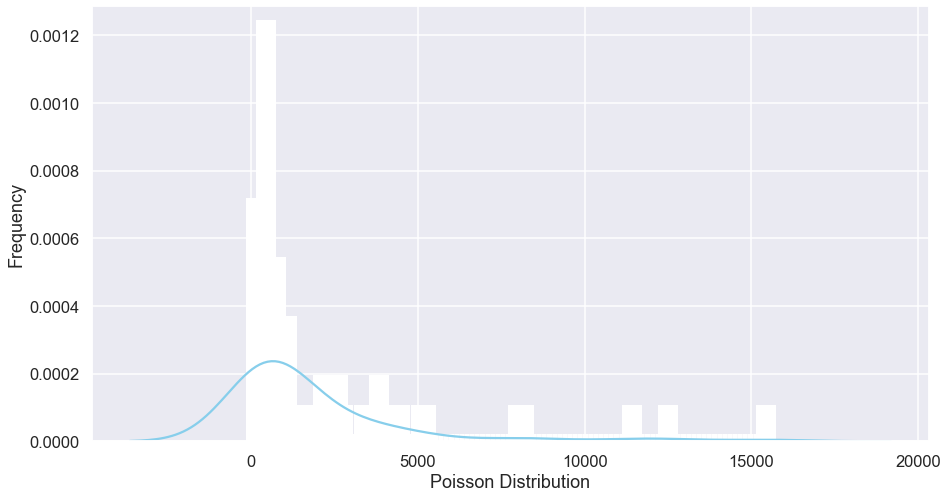

In [47]:
data = df_dsiprob["TOTAL"]
ax = sns.distplot(data, bins=100, kde=True, color='skyblue', hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')


**Conclusion**

Terlihat pada plot di atas, probabilitas distribusi data mengenai total unit terjual yang dibangun anatara tahun 1900 sampai 2001 merupakan jenis distribusi poisson. Alasanya karena distribuasi poisson biasanya digunakan untuk menghitung peristiwa selama jangka waktu tertentu. Hal tersebut sama dengan data yang saya gunakan yaitu total unit terjual yang dibangun anatara tahun 1900 sampai 2001.

### Confidence Intervals of mean

**Implementasi confidence Intervals dari df_1**


In [53]:
mean_tot = df_1["TOTAL"].mean() # Mean dari total df_1
sd_tot = df_1["TOTAL"].std(ddof=1) # std dari total df_1
n = df_1["TOTAL"].size # Ukuran total df_1
z = 1.96 # confidence 95% 

mean_tot, sd_tot, n, z

(1536.2772277227723, 2579.7582139371575, 101, 1.96)

In [49]:
se = sd_tot/np.sqrt(n)
lcb = mean_tot-z*se
ucb = mean_tot+z*se
lcb,ucb

(1033.1539762578072, 2039.4004791877373)

Maka confidence intervals dari total unit terjual yang dibangun pada tahun 1900 sampai 2000 adalah diantara 1033.1539762578072 dan 2039.4004791877373

### Hypothesis test

Pertanyaan: Apakah ada perbedaan rata-rata total unit yang dijual antara properti yang dibangun pada tahun 1900 -2000 dan 2001-2017?

H0:  Rata-rata total unit yang dijual antara properti yang dibangun pada tahun 1900 -2000 dan 2001-2017 sama.

H1: Rata-rata total unit yang dijual antara properti yang dibangun pada tahun 1900 -2000 dan 2001-2017 berbeda.



In [50]:
mean_tot1 = df_1["TOTAL"].mean() # Mean dari total df_1
sd_tot1 = df_1["TOTAL"].std(ddof=1) # std dari total df_1
n1 = df_1["TOTAL"].size # Ukuran total df_1

mean_tot1, sd_tot1, n1

(1536.2772277227723, 2579.7582139371575, 101)

In [51]:
mean_tot2 = df_2["TOTAL"].mean() # Mean dari total df_2
sd_tot2 = df_2["TOTAL"].std(ddof=1) # std dari total df_2
n2 = df_2["TOTAL"].size # Ukuran total df_2

mean_tot2, sd_tot2, n2

(1516.5294117647059, 1177.6057870551938, 17)

In [52]:
sm.stats.ztest(df_1["TOTAL"].dropna(), df_2["TOTAL"].dropna(), alternative='two-sided')

(0.030937958022434642, 0.9753190182773444)

**Conclusion**

Karena nilai p (0.9753190182773444) lebih dari 0,05, saya dapat menyatakan gagal menolak H0 atau dengan kata lain rata-rata total unit yang dijual antara properti yang dibangun pada tahun 1900 -2000 dan 2001-2017 sama.